# DEBUG build_ml_cnn.py

In [1]:
#!/usr/bin/env python
# coding: utf-8

import os
import sys
import subprocess
import yaml
import numpy as np
import xarray as xr
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.regularizers import L1L2

from src.data_preparation import mdl_dataset

from src.modelling import mdl_input_dico  # input variables class
from src.modelling import mdl_params  # parameters class
from src.modelling import mdl_history

from src.modelling import model_cnn
# from src.modelling import super_model_dl

from src.visualization import visualize_pca
from src.visualization import mdl_introspect
from src.visualization import mdl_ypred_PCA

from src.utils import reload_config
from src.utils import tardisml_utils

2023-03-15 12:58:04.140253: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-15 12:58:06.124396: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /LUMI_CONTAINER/env1/lib:/LUMI_CONTAINER/env1/lib64:/opt/cray/pe/papi/6.0.0.15/lib64:/opt/cray/libfabric/1.15.0.0/lib64:/.singularity.d/libs
2023-03-15 12:58:06.124417: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-15 12:58:10.033226: W tensorflow/compiler/xla/stream_executor/platform/defaul

In [2]:
# add argument to pass config file
narg = len(sys.argv)  # number of arguments passed
#if narg > 1:
#    file_config = sys.argv[1]
#else:
file_config = '../config/config_to_jobs/config_CNN_no_bias_0wk.yaml'


rootdir = tardisml_utils.get_rootdir()
# file_config = '../config/data_proc_full.yaml'
conf = reload_config.Config(file_config, rootdir=rootdir, verbose=1)

Config file found: ../config/config_to_jobs/config_CNN_no_bias_0wk.yaml
PCA results in: /scratch/project_465000269/edelleo1/Leo/results/pca_i100-550_j300-629
Config file updated 'pca_dir': ../config/config_to_jobs/config_CNN_no_bias_0wk.yaml
Results in: /scratch/project_465000269/edelleo1/Leo/results/cnn_230315-125812
Folder created

Subfolder created: /scratch/project_465000269/edelleo1/Leo/results/cnn_230315-125812/ml/
Subfolder created: /scratch/project_465000269/edelleo1/Leo/results/cnn_230315-125812/figures/
Config file updated 'results_dir': ../config/config_to_jobs/config_CNN_no_bias_0wk.yaml
Config folders updated.
Config copied to: /scratch/project_465000269/edelleo1/Leo/results/cnn_230315-125812
Config file found: /scratch/project_465000269/edelleo1/Leo/results/cnn_230315-125812/config_CNN_no_bias_0wk.yaml
Default config file is now the copied following one:
/scratch/project_465000269/edelleo1/Leo/results/cnn_230315-125812/config_CNN_no_bias_0wk.yaml


In [3]:
from importlib import reload

In [4]:
reload(mdl_dataset)

<module 'src.data_preparation.mdl_dataset' from '/users/edelleo1/tardis/tardis-ml/src/data_preparation/mdl_dataset.py'>

In [5]:
# ---------------------------------------------------
#                 Defining parameters
# ---------------------------------------------------


# import pdb; pdb.set_trace()
H  = conf.load_history()['keras']['H']

In [6]:
if len(H) < 6:
    H = [0,7,14,21,28, 35, 42, 49, 56, 63, 70, 77]

new_hist = mdl_history.History(conf)
new_hist.set_zeros()
new_hist.set_SIT_history('keras', H)

# var_to_keep = ['SITf t+0', 'sisnthick t+0', '2T t+0', '2T t+8', 'MSL t+0', 'TP t+0', 'TP t+8', 'siconc t+0']  # traditionnel
# var_to_keep = ['SITf t+0', 'sisnthick t+0', '2T t+0', 'MSL t+0', 'TP t+0', 'siconc t+0']  # cnn_230217-110450
var_to_keep = ['SITf t+0', 'sisnthick t+0', '2T t+0', 'MSL t+0', 'TP t+0', 'siconc t+0', 'SIA t+0']

print('SIA in !!')

SIA in !!


In [7]:
from src.data_preparation import load_data

In [8]:
reload(load_data)

<module 'src.data_preparation.load_data' from '/users/edelleo1/tardis/tardis-ml/src/data_preparation/load_data.py'>

In [9]:
reload(mdl_dataset)

<module 'src.data_preparation.mdl_dataset' from '/users/edelleo1/tardis/tardis-ml/src/data_preparation/mdl_dataset.py'>

In [10]:
# ---------------------------------------------------
#                 Loading data
# ---------------------------------------------------
# print('Loading data...')
#ds = mdl_dataset.Dataset(conf, setup='no_bias', history=new_hist, var_to_keep=var_to_keep)
ds = mdl_dataset.Dataset(conf, setup=conf.setup, history=new_hist, var_to_keep=var_to_keep)
# objective:str='global_train'

regularizers = [L1L2(l1=0.01, l2=0)] # , L1L2(l1=0, l2=0.01), L1L2(l1=0.1, l2=0.1)]


Initialisation dataset...
Loading data...


/LUMI_CONTAINER/env1/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 1.1.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/LUMI_CONTAINER/env1/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 1.1.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sia...


/LUMI_CONTAINER/env1/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 1.1.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


	Retrieve siconc


/LUMI_CONTAINER/env1/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 1.1.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


	Retrieve sisnthick


/LUMI_CONTAINER/env1/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 1.1.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


	Retrieve zos


/LUMI_CONTAINER/env1/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 1.1.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


	Retrieve vxsi


/LUMI_CONTAINER/env1/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 1.1.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


	Retrieve vysi


/LUMI_CONTAINER/env1/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 1.1.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading forcing values...
Loading pca...


/LUMI_CONTAINER/env1/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 1.1.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Apply land/ocean mask...
Retrieve PCs and EOFs
Adding sia
New variable selection:
  ['SITf t+0 PC0' 'SITf t+0 PC1' 'SITf t+0 PC2' 'SITf t+0 PC3'
 'SITf t+0 PC4' 'SITf t+0 PC5' 'SITf t+0 PC6' 'SITf t+0 PC7'
 'sisnthick t+0 PC0' 'sisnthick t+0 PC1' 'sisnthick t+0 PC2'
 'sisnthick t+0 PC3' '2T t+0 PC0' '2T t+0 PC1' '2T t+0 PC2' '2T t+0 PC3'
 'MSL t+0 PC0' 'MSL t+0 PC1' 'MSL t+0 PC2' 'MSL t+0 PC3' 'TP t+0 PC0'
 'TP t+0 PC1' 'TP t+0 PC2' 'TP t+0 PC3' 'siconc t+0 PC0' 'siconc t+0 PC1'
 'siconc t+0 PC2' 'siconc t+0 PC3']
Variables updated: do not forget to execute self.format_for_dl() if Deep Learning
Size of the training set:    1909 days
Size of the validation set:   440 days
Size of the test set:         588 days
Config file updated 'ntrain': /scratch/project_465000269/edelleo1/Leo/results/cnn_230315-125812/config_CNN_no_bias_0wk.yaml
Config file updated 'nval': /scratch/project_465000269/edelleo1/Leo/results/cnn_230315-125812/config_CNN_no_bias_0wk.yaml
Config file updated 'ntest': /scrat

In [11]:
conf.epochs = 2

In [51]:
# ---------------------------------------------------
#                 Building cnn
# ---------------------------------------------------

n_components = ds.config.n_comp['tp']

suffixe = ''  # useless ?
reg = regularizers[0]
    
m4 = model_cnn.ModelCNN(ds, ds.dataset['Xtrain'].shape[1], ds.dataset['Xtrain'].shape[2], reg=reg, rootdir=ds.config.rootdir, ml_dir=ds.config.ml_dir, fig_dir=ds.config.fig_dir)
m4.compile_models(npca=n_components)  # name

# dbug - should be good
# m4.print_summary()
# import pdb; pdb.set_trace()

m4.fit_multiple(ds.dataset, suffix=suffixe)
m4.print_histories()

input change depending on model !!
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Fitting...
Epoch 1/2
465/465 [==============================] - 1s 2ms/step - loss: 1374.7046 - r_square: 0.0641 - root_mean_squared_error: 37.0770 - val_loss: 954.7435 - val_r_square: 0.2057 - val_root_mean_squared_error: 30.8989
Epoch 2/2
465/465 [==============================] - 1s 1ms/step - loss: 984.8113 - r_square: 0.3295 - root_mean_squared_error: 31.3817 - val_loss: 743.0245 - val_r_square: 0.3819 - val_root_mean_squared_error: 27.2585
pc0 Training finished !
Epoch 1/2
465/465 [==============================] - 1s 2ms/step - loss: 785.0805 - r_square: 0.2040 - root_mean_squared_error: 28.0193 - val_loss: 187.1216 - val_r_square: -0.5736 - val_root_mean_squared_error: 13.6792
Epoch 2/2
465/465 [==============================] - 1s 1ms/step - loss: 435.8426 - r_square: 0.5581 - root_mean_squared_error: 20.8768 - val_loss: 292.1548 - val_r_square: -1.4569 - 

In [52]:
m4.predict_multiple(ds.dataset)

90/90 [==============================] - 0s 889us/step
Prediction finished !! - for lstm_at only


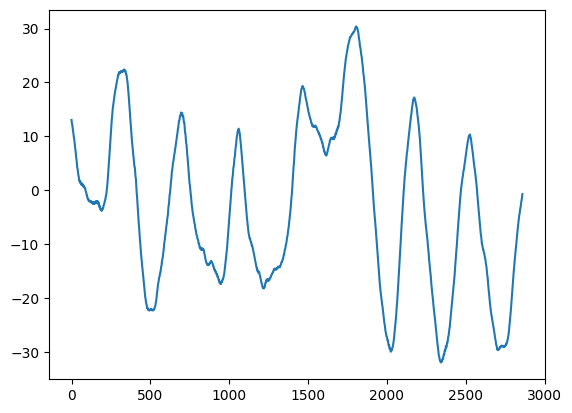

In [54]:
plt.plot(m4.ypred[:,0])

In [ ]:
m4.save_prediction()

# m4.save_model()
m4.save_model_weights()

ofile = f'{m4.type}_ypred.png'
mdl_ypred_PCA.draw(m4, odir=m4.rootdir+m4.fig_dir, savefig=True, showfig=False, ofile=ofile)



       